In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Load the dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/nearest-earth-objects(1910-2024).csv")
df.head(5)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


Display basic info and first few rows

In [6]:
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB
None
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50             

Handling missing values

In [7]:
df.dropna(inplace=True)

EDA - Plot hazardous vs non-hazardous

<ipython-input-8-d61d18d06cf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["is_hazardous"], palette=["red", "blue"])


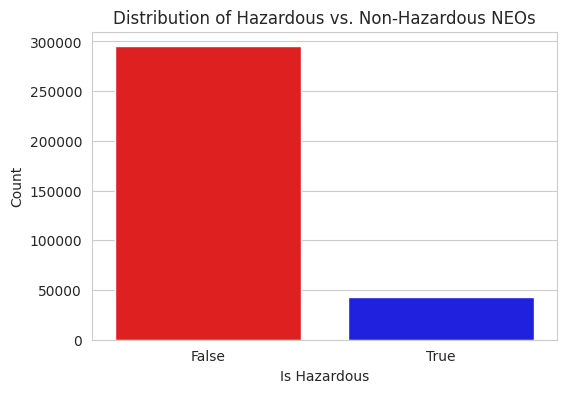

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x=df["is_hazardous"], palette=["red", "blue"])
plt.title("Distribution of Hazardous vs. Non-Hazardous NEOs")
plt.xlabel("Is Hazardous")
plt.ylabel("Count")
plt.show()

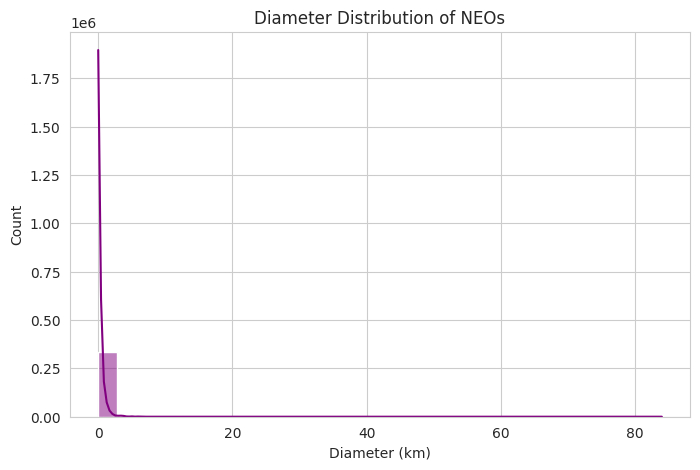

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["estimated_diameter_max"], bins=30, kde=True, color="purple")
plt.title("Diameter Distribution of NEOs")
plt.xlabel("Diameter (km)")
plt.ylabel("Count")
plt.show()

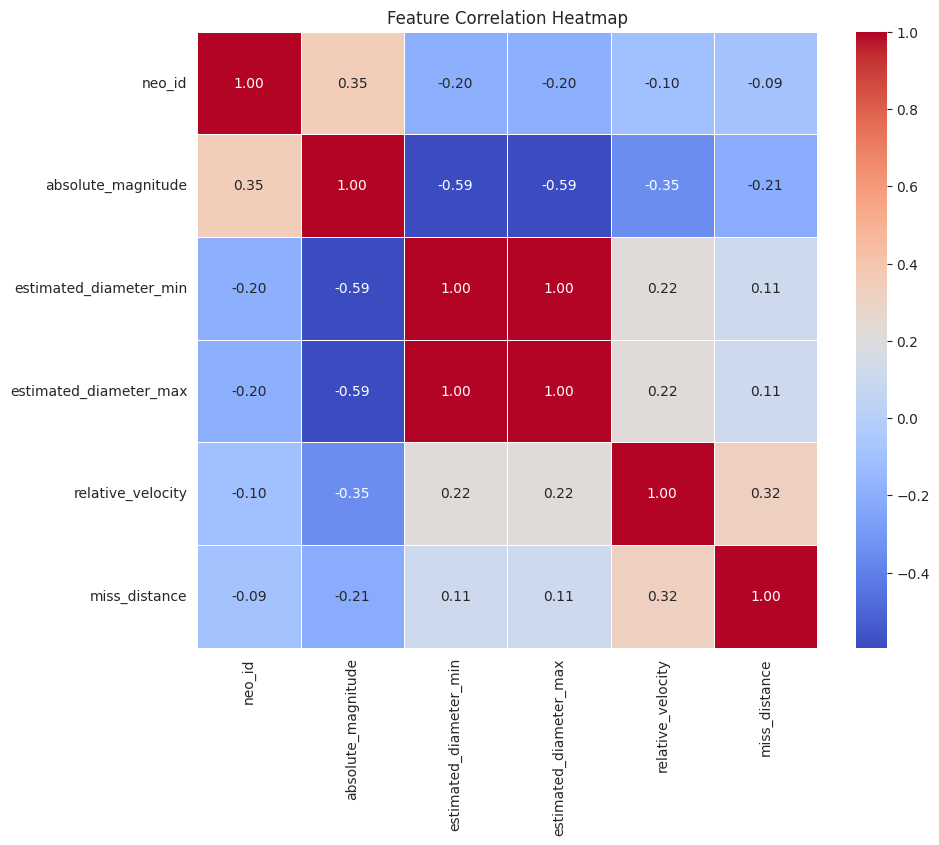

In [11]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


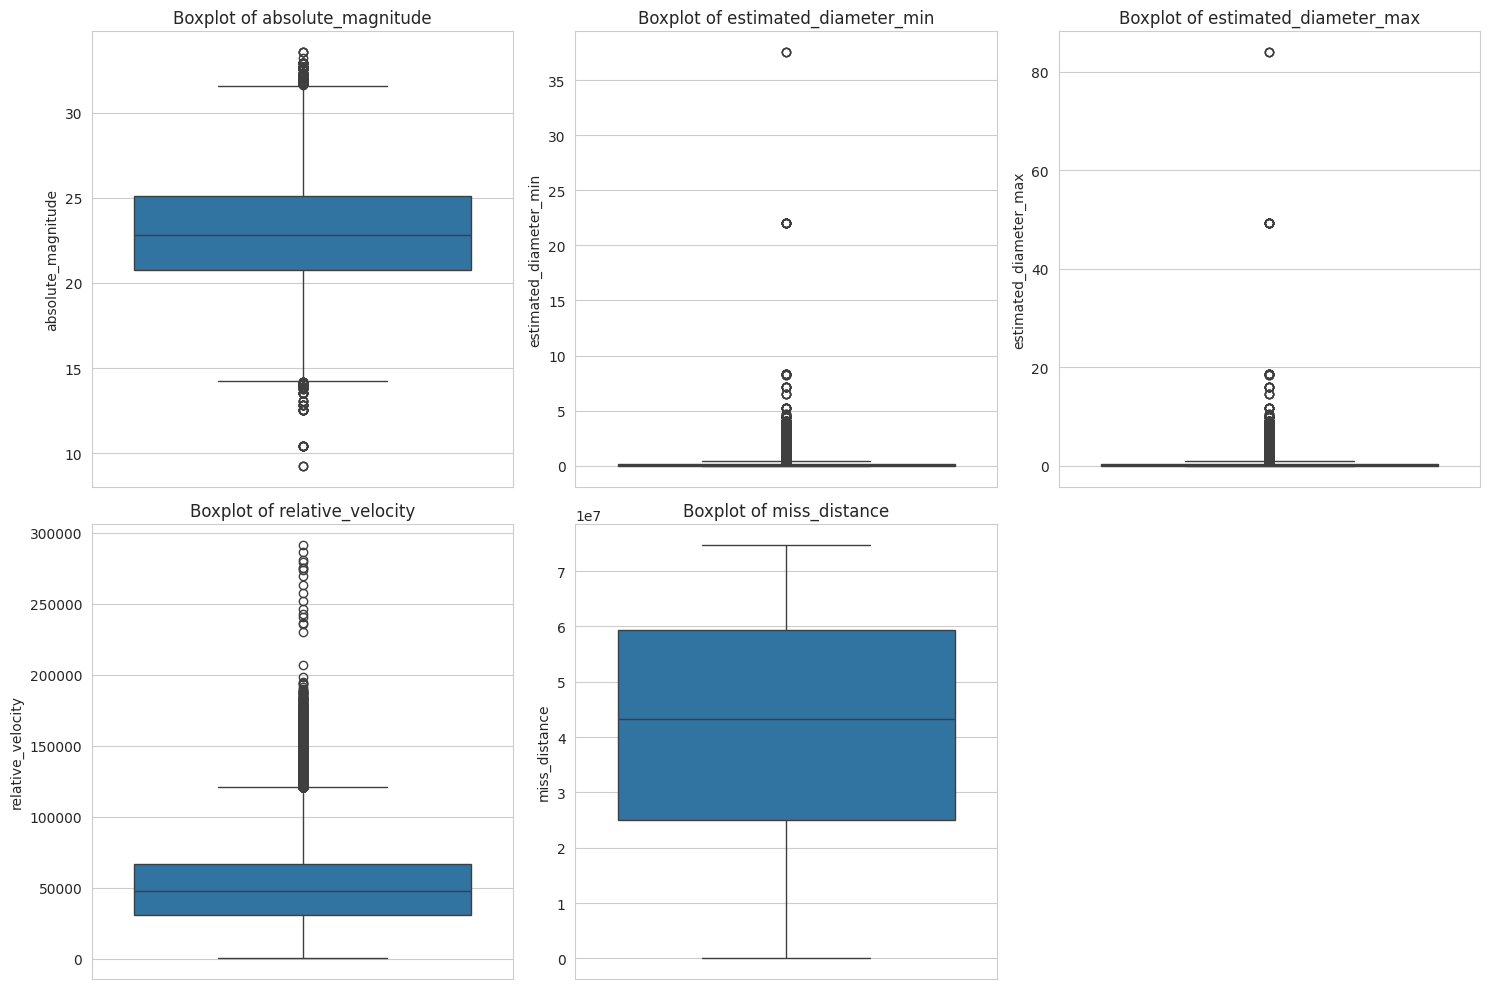

In [14]:
available_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
if 'orbital_period' in df.columns:
    available_features.append('orbital_period')

plt.figure(figsize=(15, 10))
for i, col in enumerate(available_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


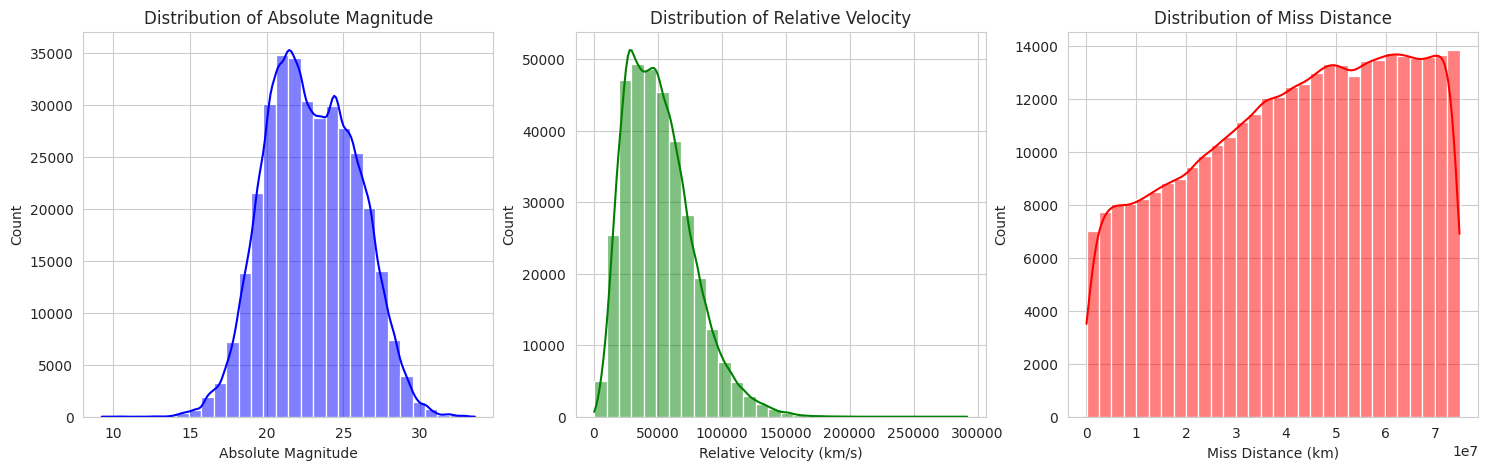

In [15]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#absolute_magnitude
sns.histplot(df["absolute_magnitude"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Absolute Magnitude")
axes[0].set_xlabel("Absolute Magnitude")

#relative_velocity
sns.histplot(df["relative_velocity"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Relative Velocity")
axes[1].set_xlabel("Relative Velocity (km/s)")

#miss_distance
sns.histplot(df["miss_distance"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Miss Distance")
axes[2].set_xlabel("Miss Distance (km)")

#Show histograms
plt.show()


Feature Engineering

In [ ]:
label_encoders = {}

for col in df.select_dtypes(include=["object"]).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(df.head())
print(y_train_resampled.value_counts())

    neo_id   name  absolute_magnitude  estimated_diameter_min  \
0  2162117  30600               19.14                0.394962   
1  2349507  31392               18.50                0.530341   
2  2455415  32115               21.45                0.136319   
3  3132126    736               20.63                0.198863   
4  3557844   4877               22.70                0.076658   

   estimated_diameter_max  orbiting_body  relative_velocity  miss_distance  \
0                0.883161              0       71745.401048   5.814362e+07   
1                1.185878              0      109949.757148   5.580105e+07   
2                0.304818              0       24865.506798   6.720689e+07   
3                0.444672              0       78890.076805   3.039644e+07   
4                0.171412              0       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False  
is_hazardous
True     235921
Fal

Random Forest

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())


is_hazardous
True     235921
False    235921
Name: count, dtype: int64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
<ipython-input-23-1d63bc018e4b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


 Accuracy: 0.7700
 Precision: 0.3514
 Recall: 0.9690
 F1 Score: 0.5157
 AUC-ROC: 0.8551


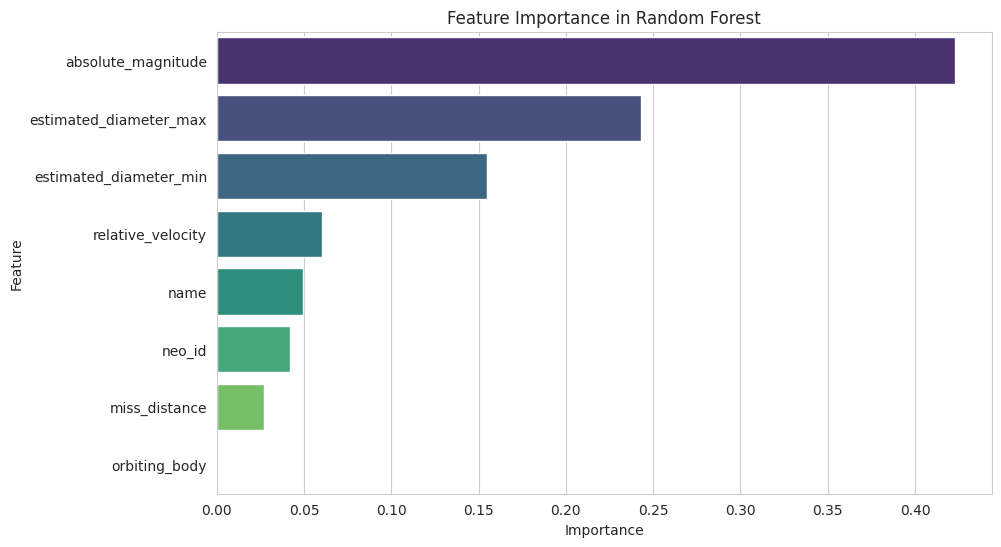

In [23]:
rf_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" AUC-ROC: {auc:.4f}")


feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
